<a href="https://colab.research.google.com/github/Dee-Nwanjah/Python-Pandas-Mastery-Through-Real-Data/blob/main/6.)%20Expense_Analyzer_from_Bank_Statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# setup and Creating Sample Bank Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Create realistic sample bank transaction data
def create_sample_bank_data():
    np.random.seed(42)

    # Generate 6 months of transactions
    start_date = datetime.now() - timedelta(days=180)
    dates = pd.date_range(start_date, periods=200, freq='D')

    # Sample transaction data
    transactions = []

    # Common transaction types and patterns
    expense_categories = {
        'Groceries': {'vendors': ['WALMART', 'KROGER', 'WHOLE FOODS', 'TRADER JOES'], 'amount_range': (-150, -30)},
        'Gas': {'vendors': ['SHELL', 'EXXON', 'BP', 'CHEVRON'], 'amount_range': (-80, -25)},
        'Restaurants': {'vendors': ['MCDONALDS', 'STARBUCKS', 'CHIPOTLE', 'SUBWAY'], 'amount_range': (-50, -8)},
        'Utilities': {'vendors': ['ELECTRIC COMPANY', 'GAS COMPANY', 'WATER DEPT'], 'amount_range': (-200, -50)},
        'Entertainment': {'vendors': ['NETFLIX', 'SPOTIFY', 'AMAZON PRIME', 'MOVIE THEATER'], 'amount_range': (-30, -10)},
        'Shopping': {'vendors': ['AMAZON', 'TARGET', 'COSTCO', 'BEST BUY'], 'amount_range': (-300, -20)},
        'Healthcare': {'vendors': ['PHARMACY', 'DR SMITH', 'DENTIST'], 'amount_range': (-150, -25)}
    }

    income_sources = ['SALARY DEPOSIT', 'FREELANCE PAYMENT', 'REFUND']

    # Generate a larger number of transactions to ensure variety
    for i in range(1000):  # Increased to 1000 transactions
        date = random.choice(dates)

        # Ensure a mix of income and expenses
        if i % 5 == 0:  # Every 5th transaction is income
             description = random.choice(income_sources)
             amount = random.uniform(1000, 5000)
             category = 'Income'
        else:  # The rest are expenses
            category = random.choice(list(expense_categories.keys()))
            vendor = random.choice(expense_categories[category]['vendors'])
            amount_range = expense_categories[category]['amount_range']
            amount = random.uniform(amount_range[0], amount_range[1])
            description = f"{vendor} PURCHASE"


        transactions.append({
            'date': date,
            'description': description,
            'amount': amount,
            'category': category,
            'balance': None  # We'll calculate this later
        })

    # Sort by date and calculate running balance
    df = pd.DataFrame(transactions).sort_values('date').reset_index(drop=True)
    df['balance'] = df['amount'].cumsum() + 5000  # Starting balance of $5000

    return df

# Create and save sample data
bank_data = create_sample_bank_data()
bank_data.to_csv('bank_transactions.csv', index=False)

print("Sample bank data created!")
print(f"Shape: {bank_data.shape}")
print("\nFirst few transactions:")
print(bank_data.head())
print(f"\nDate range: {bank_data['date'].min()} to {bank_data['date'].max()}")

Sample bank data created!
Shape: (1000, 5)

First few transactions:
                        date            description      amount  \
0 2025-02-03 15:15:07.062770  AMAZON PRIME PURCHASE  -28.225085   
1 2025-02-03 15:15:07.062770      BEST BUY PURCHASE -159.509360   
2 2025-02-03 15:15:07.062770      DR SMITH PURCHASE  -25.206391   
3 2025-02-03 15:15:07.062770   TRADER JOES PURCHASE -118.117074   
4 2025-02-03 15:15:07.062770   GAS COMPANY PURCHASE -176.067621   

        category      balance  
0  Entertainment  4971.774915  
1       Shopping  4812.265555  
2     Healthcare  4787.059164  
3      Groceries  4668.942090  
4      Utilities  4492.874469  

Date range: 2025-02-03 15:15:07.062770 to 2025-08-21 15:15:07.062770


Explore bank statement

In [11]:
# Load bank transaction data
df = pd.read_csv('bank_transactions.csv')
df['date'] = pd.to_datetime(df['date'])

print("=== THE FINANCIAL DATA OVERVIEW ===")
print(f"📊 Total transactions: {len(df):,}")
print(f"📅 Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"💰 Current balance: ${df['balance'].iloc[-1]:,.2f}")

# Separate income and expenses
income_df = df[df['amount'] > 0]
expense_df = df[df['amount'] < 0]

print(f"\n💸 Total expenses: ${expense_df['amount'].sum():,.2f}")
print(f"💵 Total income: ${income_df['amount'].sum():,.2f}")
print(f"📈 Net change: ${df['amount'].sum():,.2f}")

# Add time-based columns for analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week

print("\nSample of your transactions:")
print(df[['date', 'description', 'amount', 'category']].head())

=== THE FINANCIAL DATA OVERVIEW ===
📊 Total transactions: 1,000
📅 Date range: 2025-02-03 to 2025-08-21
💰 Current balance: $518,425.06

💸 Total expenses: $-62,533.76
💵 Total income: $575,958.81
📈 Net change: $513,425.06

Sample of your transactions:
                        date            description      amount       category
0 2025-02-03 15:15:07.062770  AMAZON PRIME PURCHASE  -28.225085  Entertainment
1 2025-02-03 15:15:07.062770      BEST BUY PURCHASE -159.509360       Shopping
2 2025-02-03 15:15:07.062770      DR SMITH PURCHASE  -25.206391     Healthcare
3 2025-02-03 15:15:07.062770   TRADER JOES PURCHASE -118.117074      Groceries
4 2025-02-03 15:15:07.062770   GAS COMPANY PURCHASE -176.067621      Utilities


Expense Category Analysis

=== SPENDING INSIGHTS ===
💸 Biggest expense category: Online Shopping ($17,032.99)
📅 Most expensive day: Friday ($9,868.16)
📊 Average daily spending: $320.69


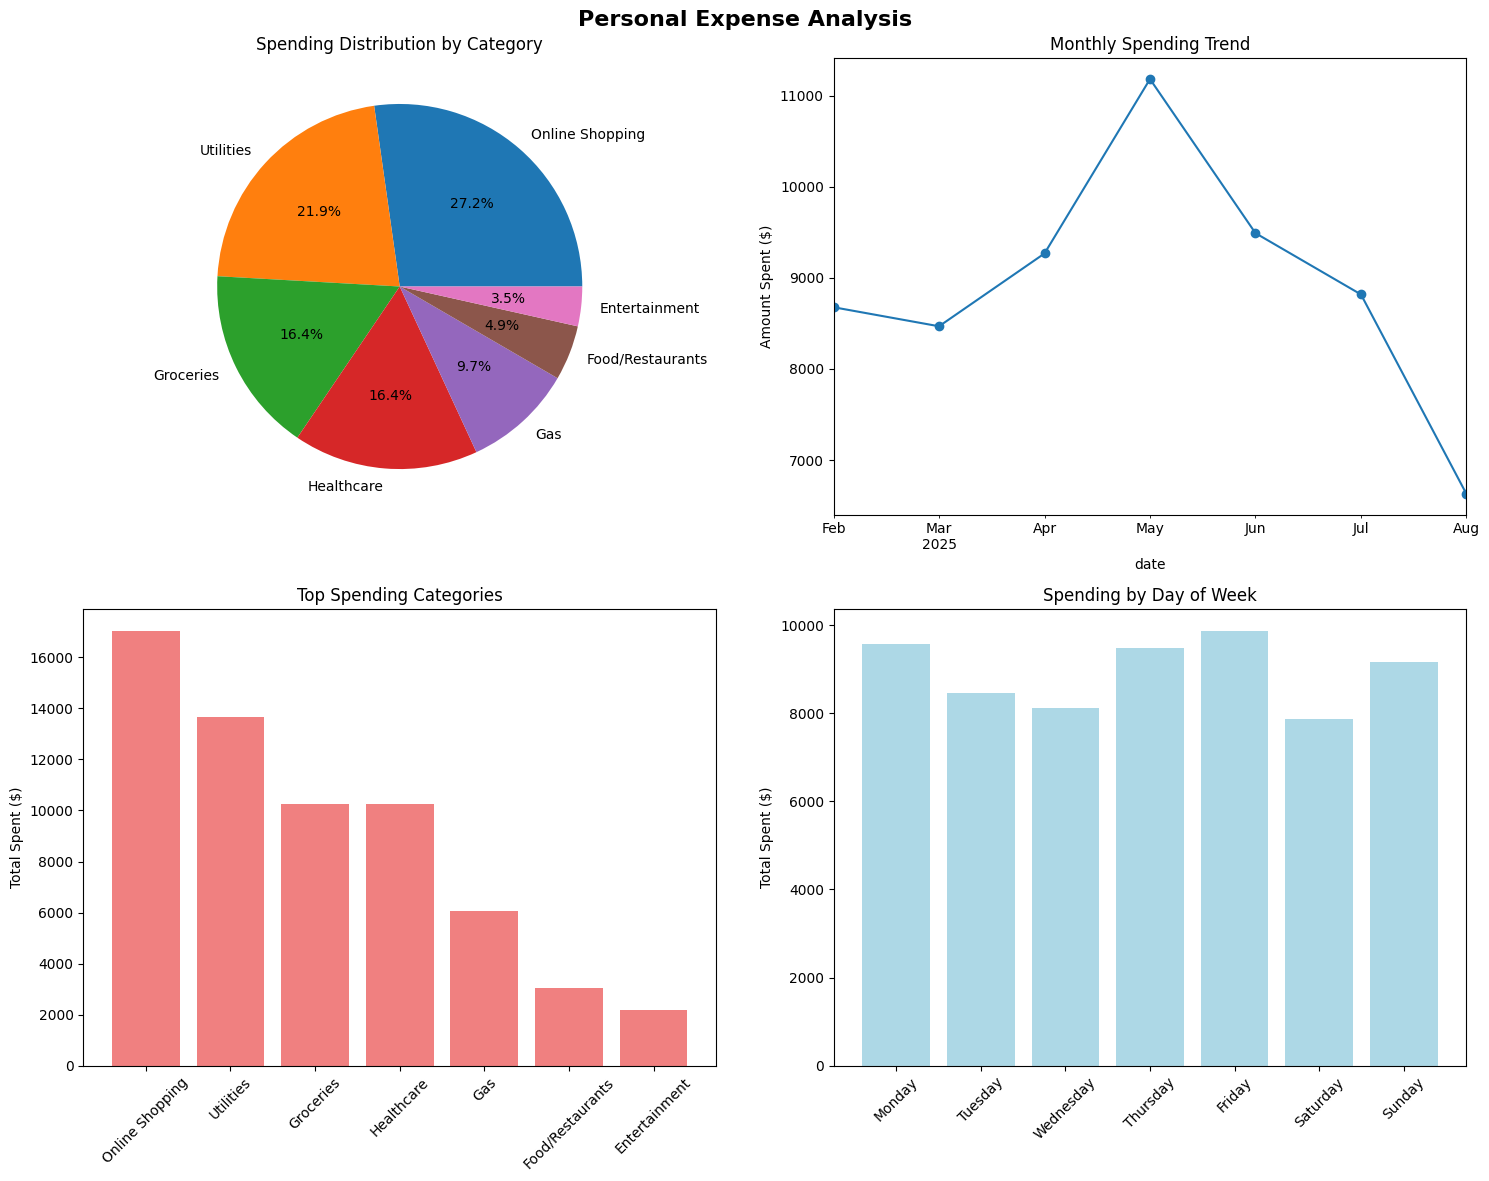

In [17]:
# Analyze spending by category
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Personal Expense Analysis', fontsize=16, fontweight='bold')

# Function to categorize transactions based on narration
def categorize_transaction(description):
    description = str(description).upper()
    if 'GAS FILLING STATION' in description or 'PETROL' in description or 'SHELL' in description or 'EXXON' in description or 'BP' in description or 'CHEVRON' in description:
        return 'Gas'
    elif 'UPI' in description or 'PAYTM' in description or 'PHONEPE' in description:
        return 'UPI/Digital Payment'
    elif 'ATM' in description:
        return 'ATM Withdrawal'
    elif 'NEFT' in description or 'IMPS' in description or 'RTGS' in description:
        return 'Bank Transfer'
    elif 'AMAZON' in description or 'FLIPKART' in description or 'TARGET' in description or 'COSTCO' in description or 'BEST BUY' in description:
        return 'Online Shopping'
    elif 'SWIGGY' in description or 'ZOMATO' in description or 'MCDONALDS' in description or 'STARBUCKS' in description or 'CHIPOTLE' in description or 'SUBWAY' in description:
        return 'Food/Restaurants'
    elif 'RENT' in description:
        return 'Rent'
    elif 'SALARY' in description:
        return 'Salary'
    elif 'WALMART' in description or 'KROGER' in description or 'WHOLE FOODS' in description or 'TRADER JOES' in description:
        return 'Groceries'
    elif 'ELECTRIC COMPANY' in description or 'GAS COMPANY' in description or 'WATER DEPT' in description:
        return 'Utilities'
    elif 'NETFLIX' in description or 'SPOTIFY' in description or 'AMAZON PRIME' in description or 'MOVIE THEATER' in description:
        return 'Entertainment'
    elif 'PHARMACY' in description or 'DR SMITH' in description or 'DENTIST' in description:
        return 'Healthcare'
    else:
        return 'Other'

# Add category and time-based columns to the main DataFrame first
df['category'] = df['description'].apply(categorize_transaction)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week


# Separate income and expenses
income_df = df[df['amount'] > 0].copy()
expense_df = df[df['amount'] < 0].copy()


# Check if expense_df is empty
if expense_df.empty:
    print("No expense transactions found in the dataset.")
    # You might want to hide or remove the plots if no expenses are found
    for ax_row in axes:
        for ax in ax_row:
            ax.set_visible(False)
else:
    # 1. Spending by category (pie chart) - Show breakdown of 'Other'
    other_expenses_df = expense_df[expense_df['category'] == 'Other']
    if not other_expenses_df.empty:
        # Group by description for 'Other' category and show top ones
        other_description_expenses = other_expenses_df.groupby('description')['amount'].sum().abs().sort_values(ascending=False)
        # Take top N descriptions from 'Other', group the rest
        top_n = 5  # You can adjust this number
        if len(other_description_expenses) > top_n:
            top_other_expenses = other_description_expenses.head(top_n)
            other_sum = other_description_expenses.iloc[top_n:].sum()
            if other_sum > 0:
                top_other_expenses['Other (remaining)'] = other_sum
            expense_by_category = expense_df[expense_df['category'] != 'Other'].groupby('category')['amount'].sum().abs()
            combined_expenses = pd.concat([expense_by_category, top_other_expenses])
        else:
            # If less than or equal to top_n 'Other' descriptions, just show them all
            expense_by_category = expense_df[expense_df['category'] != 'Other'].groupby('category')['amount'].sum().abs()
            combined_expenses = pd.concat([expense_by_category, other_description_expenses])

        axes[0, 0].pie(combined_expenses.values, labels=combined_expenses.index, autopct='%1.1f%%')
        axes[0, 0].set_title('Spending Distribution by Category (with Other breakdown)')
    else:
        # If no 'Other' category, just plot the main categories
        expense_by_category = expense_df.groupby('category')['amount'].sum().abs().sort_values(ascending=False)
        axes[0, 0].pie(expense_by_category.values, labels=expense_by_category.index, autopct='%1.1f%%')
        axes[0, 0].set_title('Spending Distribution by Category')


    # 2. Monthly spending trend
    monthly_expenses = expense_df.set_index('date').resample('ME')['amount'].sum().abs()
    monthly_expenses.plot(kind='line', marker='o', ax=axes[0, 1])
    axes[0, 1].set_title('Monthly Spending Trend')
    axes[0, 1].set_ylabel('Amount Spent ($)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Top expense categories (bar chart)
    top_categories = expense_by_category.nlargest(7)
    axes[1, 0].bar(top_categories.index, top_categories.values, color='lightcoral')
    axes[1, 0].set_title('Top Spending Categories')
    axes[1, 0].set_ylabel('Total Spent ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. Daily spending pattern
    daily_spending = expense_df.groupby('day_name')['amount'].sum().abs()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_spending = daily_spending.reindex(day_order)
    axes[1, 1].bar(daily_spending.index, daily_spending.values, color='lightblue')
    axes[1, 1].set_title('Spending by Day of Week')
    axes[1, 1].set_ylabel('Total Spent ($)')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # Print insights
    print("=== SPENDING INSIGHTS ===")
    if 'Other' in expense_by_category.index:
         print(f"💸 Biggest expense category: Other (${expense_by_category['Other']:,.2f})")
    elif not expense_by_category.empty:
        print(f"💸 Biggest expense category: {expense_by_category.idxmax()} (${expense_by_category.max():,.2f})")

    if not daily_spending.empty:
        print(f"📅 Most expensive day: {daily_spending.idxmax()} (${daily_spending.max():,.2f})")
    if not expense_df.empty:
        print(f"📊 Average daily spending: ${expense_df['amount'].abs().sum() / len(expense_df.groupby(expense_df['date'].dt.date)):,.2f}")


plt.tight_layout()
plt.show()

Income vs Expense Analysis

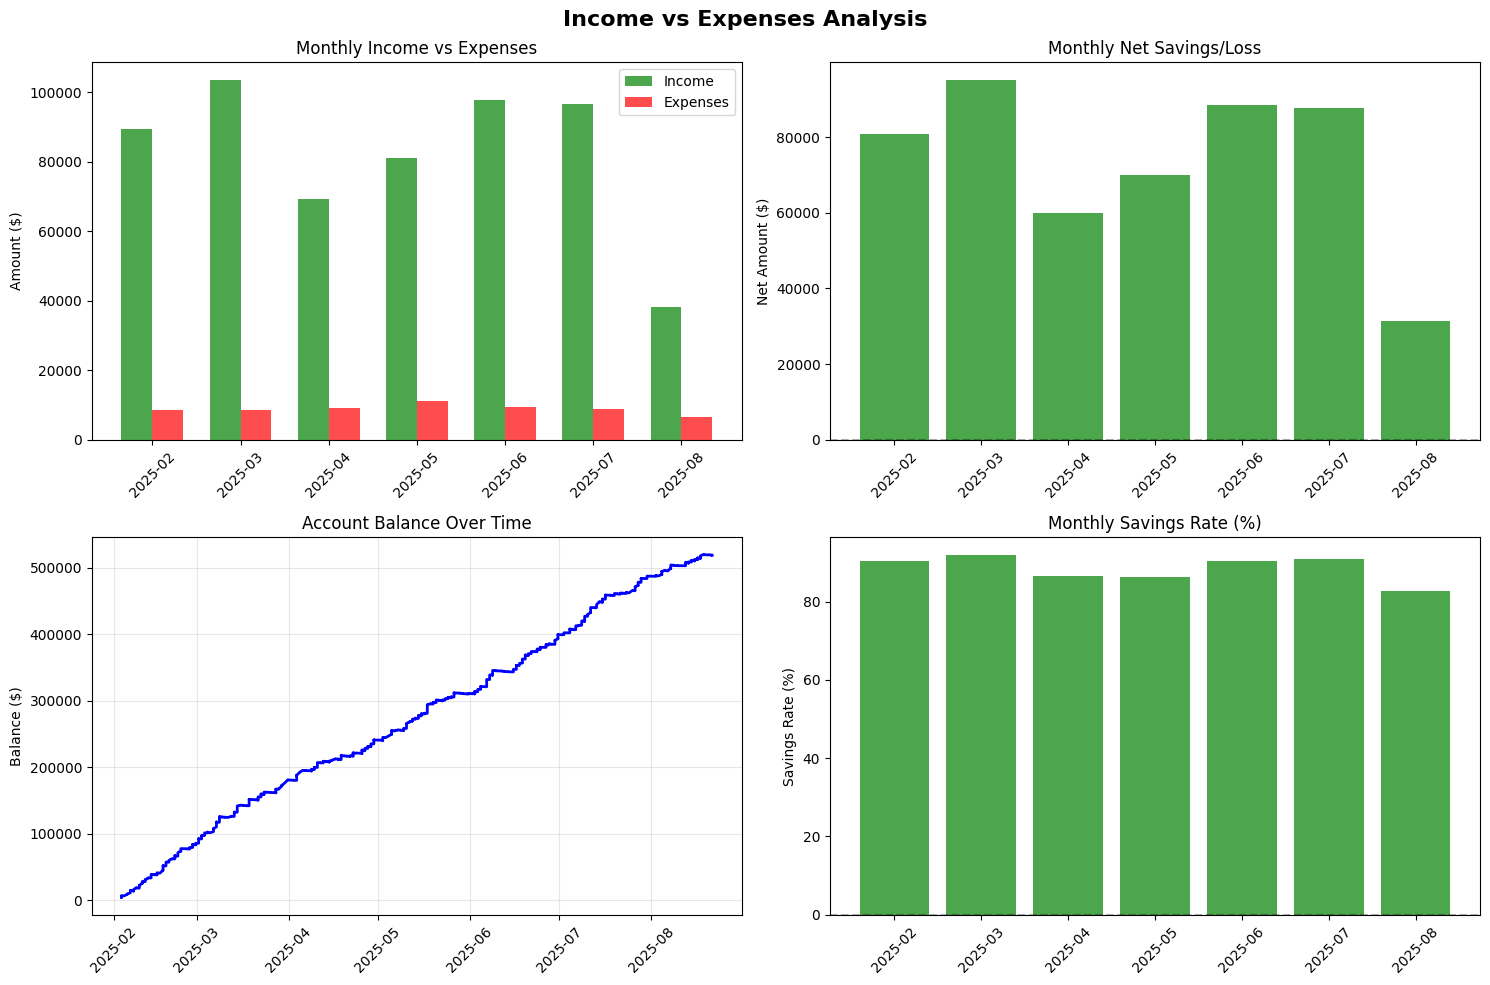

=== FINANCIAL HEALTH INSIGHTS ===
💰 Average monthly income: $82,279.83
💸 Average monthly expenses: $8,933.39
📊 Average savings rate: 88.4%
🏦 Balance change: $513,453.28
✅ Excellent! You're saving over 20% of your income.


In [18]:
# Monthly income vs expenses comparison
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'amount': lambda x: {
        'income': x[x > 0].sum(),
        'expenses': abs(x[x < 0].sum()),
        'net': x.sum()
    }
}).reset_index()

# Extract the dictionary values into separate columns
monthly_summary = pd.DataFrame({
    'month': monthly_data['date'],
    'income': [x['income'] for x in monthly_data['amount']],
    'expenses': [x['expenses'] for x in monthly_data['amount']],
    'net': [x['net'] for x in monthly_data['amount']]
})

# Create income vs expenses visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Income vs Expenses Analysis', fontsize=16, fontweight='bold')

# 1. Monthly income vs expenses
x = range(len(monthly_summary))
width = 0.35
axes[0, 0].bar([i - width/2 for i in x], monthly_summary['income'], width, label='Income', color='green', alpha=0.7)
axes[0, 0].bar([i + width/2 for i in x], monthly_summary['expenses'], width, label='Expenses', color='red', alpha=0.7)
axes[0, 0].set_title('Monthly Income vs Expenses')
axes[0, 0].set_ylabel('Amount ($)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels([str(m) for m in monthly_summary['month']], rotation=45)
axes[0, 0].legend()

# 2. Net savings by month
axes[0, 1].bar(range(len(monthly_summary)), monthly_summary['net'],
               color=['green' if x > 0 else 'red' for x in monthly_summary['net']], alpha=0.7)
axes[0, 1].set_title('Monthly Net Savings/Loss')
axes[0, 1].set_ylabel('Net Amount ($)')
axes[0, 1].set_xticks(range(len(monthly_summary)))
axes[0, 1].set_xticklabels([str(m) for m in monthly_summary['month']], rotation=45)
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.3)

# 3. Balance over time
axes[1, 0].plot(df['date'], df['balance'], linewidth=2, color='blue')
axes[1, 0].set_title('Account Balance Over Time')
axes[1, 0].set_ylabel('Balance ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Savings rate by month
monthly_summary['savings_rate'] = (monthly_summary['net'] / monthly_summary['income'] * 100).fillna(0)
axes[1, 1].bar(range(len(monthly_summary)), monthly_summary['savings_rate'],
               color=['green' if x > 0 else 'red' for x in monthly_summary['savings_rate']], alpha=0.7)
axes[1, 1].set_title('Monthly Savings Rate (%)')
axes[1, 1].set_ylabel('Savings Rate (%)')
axes[1, 1].set_xticks(range(len(monthly_summary)))
axes[1, 1].set_xticklabels([str(m) for m in monthly_summary['month']], rotation=45)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Print financial insights
print("=== FINANCIAL HEALTH INSIGHTS ===")
avg_income = monthly_summary['income'].mean()
avg_expenses = monthly_summary['expenses'].mean()
avg_savings_rate = monthly_summary['savings_rate'].mean()

print(f"💰 Average monthly income: ${avg_income:,.2f}")
print(f"💸 Average monthly expenses: ${avg_expenses:,.2f}")
print(f"📊 Average savings rate: {avg_savings_rate:.1f}%")
print(f"🏦 Balance change: ${df['balance'].iloc[-1] - df['balance'].iloc[0]:,.2f}")

if avg_savings_rate > 20:
    print("✅ Excellent! You're saving over 20% of your income.")
elif avg_savings_rate > 10:
    print("👍 Good job! You're saving over 10% of your income.")
elif avg_savings_rate > 0:
    print("⚠️  You're saving money, but could improve.")
else:
    print("🚨 Warning: You're spending more than you earn!")

Transaction Pattern Analysis

In [20]:
# Analyze spending patterns and unusual transactions
print("=== TRANSACTION PATTERN ANALYSIS ===")

# Add time-based columns to the main DataFrame first
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week
df['week_day'] = df['date'].dt.day_name() # Add week_day here

# Separate income and expenses
income_df = df[df['amount'] > 0].copy()
expense_df = df[df['amount'] < 0].copy()

# Find your biggest expenses
biggest_expenses = expense_df.nlargest(10, 'amount', keep='all')[['date', 'description', 'amount', 'category']]
print("\n💸 Top 10 Biggest Expenses:")
for _, expense in biggest_expenses.iterrows():
    print(f"  ${abs(expense['amount']):>8.2f} - {expense['description'][:30]} ({expense['date'].strftime('%Y-%m-%d')})")

# Analyze spending by merchant/description
merchant_spending = expense_df.groupby('description')['amount'].agg(['sum', 'count']).abs()
merchant_spending = merchant_spending.sort_values('sum', ascending=False).head(10)

print(f"\n🏪 Top 10 Merchants by Total Spending:")
for merchant, data in merchant_spending.iterrows():
    print(f"  ${data['sum']:>8.2f} - {merchant[:40]} ({data['count']} transactions)")

# Weekly spending pattern
weekly_pattern = expense_df.groupby('week_day')['amount'].sum().abs()
weekly_pattern = weekly_pattern.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print(f"\n📅 Spending by Day of Week:")
for day, amount in weekly_pattern.items():
    print(f"  {day}: ${amount:.2f}")

# Detect unusual transactions (outliers)
expense_amounts = expense_df['amount'].abs()
Q1 = expense_amounts.quantile(0.25)
Q3 = expense_amounts.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

unusual_transactions = expense_df[expense_amounts > upper_bound]
if len(unusual_transactions) > 0:
    print(f"\n🔍 Unusual Large Transactions ({len(unusual_transactions)} found):")
    for _, trans in unusual_transactions.head().iterrows():
        print(f"  ${abs(trans['amount']):>8.2f} - {trans['description'][:40]} ({trans['date'].strftime('%Y-%m-%d')})")
else:
    print(f"\n✅ No unusual large transactions detected.")

=== TRANSACTION PATTERN ANALYSIS ===

💸 Your 10 Biggest Expenses:
  $    8.74 - MCDONALDS PURCHASE (2025-07-14)
  $    8.80 - CHIPOTLE PURCHASE (2025-08-14)
  $    9.07 - MCDONALDS PURCHASE (2025-04-04)
  $    9.65 - STARBUCKS PURCHASE (2025-06-24)
  $   10.27 - SPOTIFY PURCHASE (2025-03-18)
  $   10.31 - AMAZON PRIME PURCHASE (2025-05-28)
  $   10.40 - MOVIE THEATER PURCHASE (2025-04-05)
  $   10.57 - AMAZON PRIME PURCHASE (2025-03-04)
  $   10.61 - NETFLIX PURCHASE (2025-05-30)
  $   10.71 - NETFLIX PURCHASE (2025-07-27)

🏪 Top 10 Merchants by Total Spending:
  $ 6093.90 - GAS COMPANY PURCHASE (49.0 transactions)
  $ 5624.50 - BEST BUY PURCHASE (34.0 transactions)
  $ 3898.35 - AMAZON PURCHASE (22.0 transactions)
  $ 3887.97 - WATER DEPT PURCHASE (36.0 transactions)
  $ 3825.59 - PHARMACY PURCHASE (42.0 transactions)
  $ 3690.53 - ELECTRIC COMPANY PURCHASE (29.0 transactions)
  $ 3520.13 - COSTCO PURCHASE (22.0 transactions)
  $ 3435.34 - TARGET PURCHASE (23.0 transactions)
  $ 3246.

Generate Personal Financial Report

In [22]:
# Generate comprehensive personal financial report
def generate_financial_report(df, monthly_summary):
    report_date = datetime.now().strftime('%Y-%m-%d %H:%M')

    # Calculate key metrics
    total_income = income_df['amount'].sum()
    total_expenses = abs(expense_df['amount'].sum())
    net_change = df['amount'].sum()

    # Category analysis
    top_category = expense_by_category.idxmax()
    top_category_amount = expense_by_category.max()

    # Time analysis
    most_expensive_day = daily_spending.idxmax()

    # Savings analysis
    avg_savings_rate = monthly_summary['savings_rate'].mean()

    report = f"""
{'='*60}
PERSONAL FINANCIAL ANALYSIS REPORT
{'='*60}
Generated: {report_date}
Analysis Period: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}

💰 INCOME & EXPENSES SUMMARY:
- Total Income: ${total_income:,.2f}
- Total Expenses: ${total_expenses:,.2f}
- Net Change: ${net_change:,.2f}
- Current Balance: ${df['balance'].iloc[-1]:,.2f}

📊 SPENDING ANALYSIS:
- Top Spending Category: {top_category} (${top_category_amount:,.2f})
- Most Expensive Day: {most_expensive_day} (${daily_spending.max():,.2f})
- Average Daily Spending: ${total_expenses / len(df.groupby('date')):.2f}
- Average Transaction Size: ${total_expenses / len(expense_df):.2f}

💳 MONTHLY AVERAGES:
- Average Monthly Income: ${monthly_summary['income'].mean():,.2f}
- Average Monthly Expenses: ${monthly_summary['expenses'].mean():,.2f}
- Average Savings Rate: {avg_savings_rate:.1f}%

🎯 FINANCIAL HEALTH SCORE:
"""

    # Calculate financial health score
    health_score = 0

    if avg_savings_rate > 20:
        health_score += 40
        report += "✅ Savings Rate: Excellent (40/40 points)\n"
    elif avg_savings_rate > 10:
        health_score += 30
        report += "👍 Savings Rate: Good (30/40 points)\n"
    elif avg_savings_rate > 0:
        health_score += 20
        report += "⚠️  Savings Rate: Fair (20/40 points)\n"
    else:
        health_score += 0
        report += "🚨 Savings Rate: Poor (0/40 points)\n"

    # Balance stability
    balance_trend = df['balance'].pct_change().std()
    if balance_trend < 0.1:
        health_score += 30
        report += "✅ Balance Stability: Excellent (30/30 points)\n"
    elif balance_trend < 0.2:
        health_score += 20
        report += "👍 Balance Stability: Good (20/30 points)\n"
    else:
        health_score += 10
        report += "⚠️  Balance Stability: Needs Improvement (10/30 points)\n"

    # Expense diversification
    category_concentration = (expense_by_category.max() / expense_by_category.sum()) * 100
    if category_concentration < 40:
        health_score += 30
        report += "✅ Expense Diversification: Excellent (30/30 points)\n"
    elif category_concentration < 60:
        health_score += 20
        report += "👍 Expense Diversification: Good (20/30 points)\n"
    else:
        health_score += 10
        report += "⚠️  Expense Diversification: Concentrated (10/30 points)\n"

    report += f"\n🏆 OVERALL FINANCIAL HEALTH: {health_score}/100\n"

    if health_score >= 80:
        report += "🌟 EXCELLENT - I am managing my finances very well!\n"
    elif health_score >= 60:
        report += "👍 GOOD - Solid financial management with room for improvement\n"
    elif health_score >= 40:
        report += "⚠️  FAIR - Some areas need attention\n"
    else:
        report += "🚨 NEEDS IMPROVEMENT - Consider reviewing your spending habits\n"

    # Recommendations
    report += f"\n📋 PERSONALIZED RECOMMENDATIONS:\n"

    if avg_savings_rate < 10:
        report += "• Try to save at least 10% of your income each month\n"

    if category_concentration > 50:
        report += f"• Consider reducing spending in {top_category} category\n"

    if daily_spending['Saturday'] + daily_spending['Sunday'] > daily_spending[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum() * 0.4:
        report += "• Monitor weekend spending - it's higher than weekdays\n"

    if len(unusual_transactions) > 0:
        report += f"• Review {len(unusual_transactions)} unusual large transactions\n"

    report += f"• My strongest area: {expense_by_category.idxmin()} spending is well controlled\n"

    return report

# Generate and display the report
financial_report = generate_financial_report(df, monthly_summary)
print(financial_report)

# Save the report
with open('personal_financial_report.txt', 'w') as f:
    f.write(financial_report)

print("📊 Financial report saved as 'personal_financial_report.txt'")

# Download the report using Colab
from google.colab import files
files.download('personal_financial_report.txt')


PERSONAL FINANCIAL ANALYSIS REPORT
Generated: 2025-08-02 15:44
Analysis Period: 2025-02-03 to 2025-08-21

💰 INCOME & EXPENSES SUMMARY:
- Total Income: $575,958.81
- Total Expenses: $62,533.76
- Net Change: $513,425.06
- Current Balance: $518,425.06

📊 SPENDING ANALYSIS:
- Top Spending Category: Online Shopping ($17,032.99)
- Most Expensive Day: Friday ($9,868.16)
- Average Daily Spending: $317.43
- Average Transaction Size: $78.17

💳 MONTHLY AVERAGES:
- Average Monthly Income: $82,279.83
- Average Monthly Expenses: $8,933.39
- Average Savings Rate: 88.4%

🎯 FINANCIAL HEALTH SCORE:
✅ Savings Rate: Excellent (40/40 points)
✅ Balance Stability: Excellent (30/30 points)
✅ Expense Diversification: Excellent (30/30 points)

🏆 OVERALL FINANCIAL HEALTH: 100/100
🌟 EXCELLENT - I am managing my finances very well!

📋 PERSONALIZED RECOMMENDATIONS:
• Review 25 unusual large transactions
• My strongest area: Entertainment spending is well controlled

📊 Financial report saved as 'personal_financial_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

An Interactive Budget Tracker

=== BUDGET vs ACTUAL ANALYSIS ===
                  Budget        Actual    Difference     Over_Under
Entertainment      100.0   2191.142937  -2091.142937  Over Budget ❌
Food/Restaurants     0.0   3046.507301      0.000000    On Target 🎯
Gas                200.0   6078.301397  -5878.301397  Over Budget ❌
Groceries          500.0  10271.375226  -9771.375226  Over Budget ❌
Healthcare         200.0  10241.026740 -10041.026740  Over Budget ❌
Online Shopping      0.0  17032.994138      0.000000    On Target 🎯
Restaurants        300.0      0.000000      0.000000    On Target 🎯
Shopping           400.0      0.000000      0.000000    On Target 🎯
Utilities          150.0  13672.411065 -13522.411065  Over Budget ❌


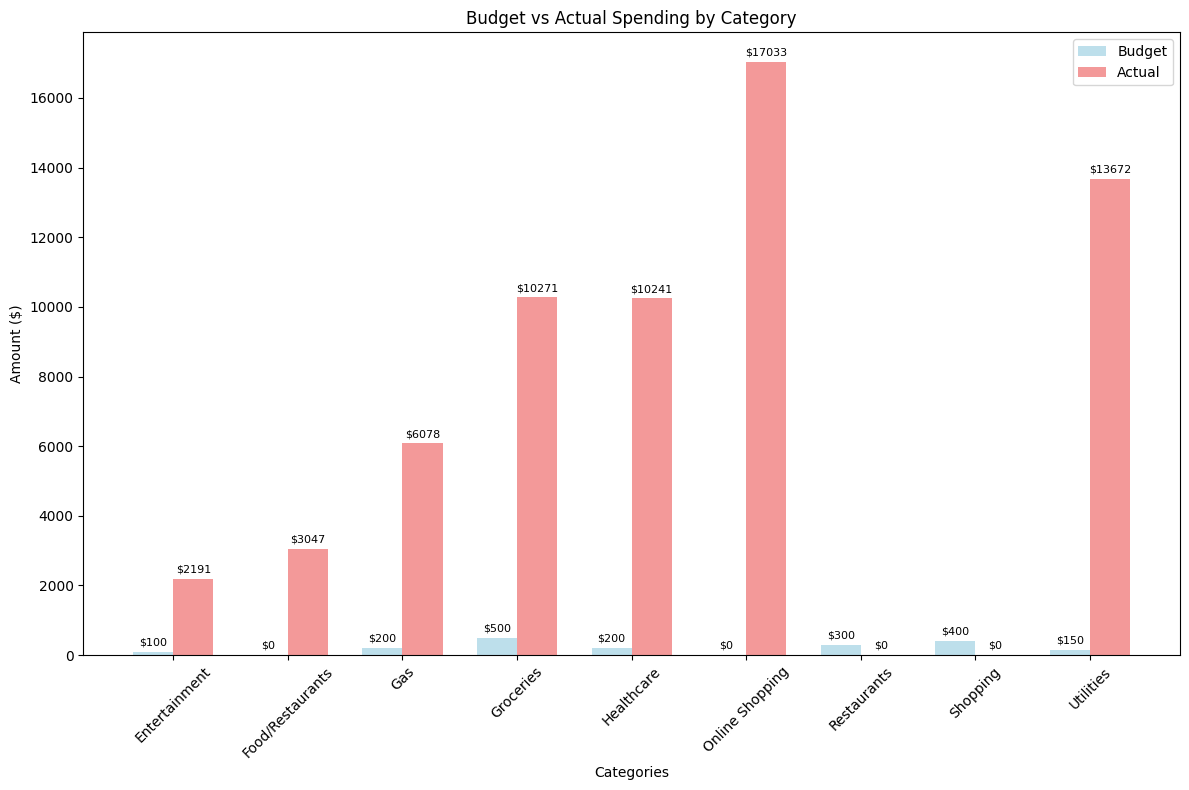


🎯 BUDGET INSIGHTS:
Categories over budget:
  • Entertainment: Over by $2091.14
  • Gas: Over by $5878.30
  • Groceries: Over by $9771.38
  • Healthcare: Over by $10041.03
  • Utilities: Over by $13522.41


In [23]:
# Create a simple budget vs actual spending comparison
def create_budget_analysis():
    """Create budget vs actual analysis"""

    # Define monthly budgets (you can customize these)
    monthly_budgets = {
        'Groceries': 500,
        'Gas': 200,
        'Restaurants': 300,
        'Utilities': 150,
        'Entertainment': 100,
        'Shopping': 400,
        'Healthcare': 200
    }

    # Calculate actual spending by category
    actual_spending = expense_df.groupby('category')['amount'].sum().abs()

    # Create comparison DataFrame
    budget_comparison = pd.DataFrame({
        'Budget': pd.Series(monthly_budgets),
        'Actual': actual_spending,
        'Difference': pd.Series(monthly_budgets) - actual_spending
    }).fillna(0)

    budget_comparison['Over_Under'] = budget_comparison['Difference'].apply(
        lambda x: 'Under Budget ✅' if x > 0 else 'Over Budget ❌' if x < 0 else 'On Target 🎯'
    )

    print("=== BUDGET vs ACTUAL ANALYSIS ===")
    print(budget_comparison)

    # Visualize budget comparison
    fig, ax = plt.subplots(figsize=(12, 8))

    categories = budget_comparison.index
    x = np.arange(len(categories))
    width = 0.35

    bars1 = ax.bar(x - width/2, budget_comparison['Budget'], width, label='Budget', alpha=0.8, color='lightblue')
    bars2 = ax.bar(x + width/2, budget_comparison['Actual'], width, label='Actual', alpha=0.8, color='lightcoral')

    ax.set_xlabel('Categories')
    ax.set_ylabel('Amount ($)')
    ax.set_title('Budget vs Actual Spending by Category')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)
    ax.legend()

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'${height:.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'${height:.0f}', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    return budget_comparison

# Run budget analysis
budget_analysis = create_budget_analysis()

print("\n🎯 BUDGET INSIGHTS:")
over_budget = budget_analysis[budget_analysis['Difference'] < 0]
if len(over_budget) > 0:
    print("Categories over budget:")
    for category, row in over_budget.iterrows():
        print(f"  • {category}: Over by ${abs(row['Difference']):.2f}")
else:
    print("🎉 Congratulations! You stayed within budget for all categories!")

under_budget = budget_analysis[budget_analysis['Difference'] > 0]
if len(under_budget) > 0:
    print(f"\nMoney saved in {len(under_budget)} categories: ${under_budget['Difference'].sum():.2f}")